This goal is to give a very naive introduction to neural networks and using them.

In [3]:
# Goal ->  Your alien(function) duty: 
# Return = Product; Input = 2 numbers

x = 5
y = 10

#Define your alien here
alien = x*y

result = alien;
print(result)

50


In [ ]:
# Read about cifar -> https://www.cs.toronto.edu/~kriz/cifar.html 
# Goal -> Your alien(function) duty: 
# Return = which object from cifar-10 dataset is present ; Input = image

# Define your alien here
'''Sure go ahead and try'''


### Neural Networks?

Sometimes, it might be difficult defining aliens.
But, we as humans learn such goals don't we?

To replicate this idea, we define alien's structure similar to that of our brain and let it become the function on its own by showing it some examples. (neural networks? Makes sense?)

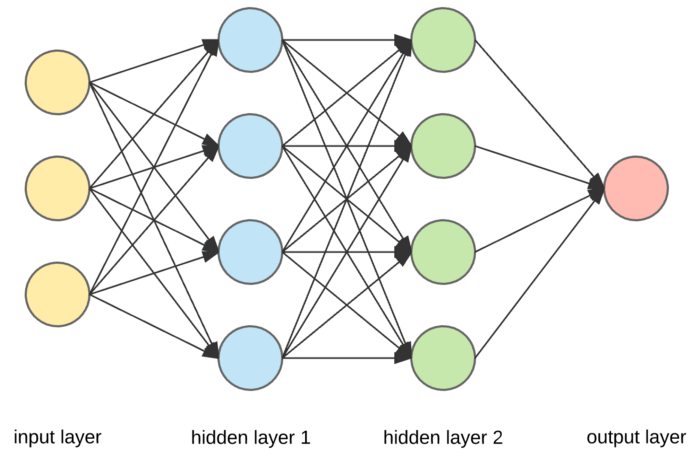

In [9]:
# Neural Networks using PyTorch
'''
Code sourced from pytorch tutorials
'''

# Bunch of imports
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
# Learning Parameters

n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [10]:
# Loading the Dataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

14.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

21.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

98.7%

Files already downloaded and verified


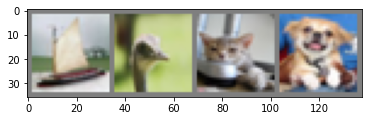

 ship  bird   cat   dog


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [25]:
# Defining the Neural Network Structure

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


# Defining loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
# Training the neural network

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1999))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.012
[1,   201] loss: 2.301
[1,   401] loss: 2.301
[1,   601] loss: 2.295
[1,   801] loss: 2.275
[1,  1001] loss: 2.249
[1,  1201] loss: 2.211
[1,  1401] loss: 2.169
[1,  1601] loss: 2.151
[1,  1801] loss: 2.134
[1,  2001] loss: 2.092
[1,  2201] loss: 2.047
[1,  2401] loss: 2.040
[1,  2601] loss: 1.960
[1,  2801] loss: 1.938
[1,  3001] loss: 1.872
[1,  3201] loss: 1.860
[1,  3401] loss: 1.829
[1,  3601] loss: 1.811
[1,  3801] loss: 1.820
[1,  4001] loss: 1.776
[1,  4201] loss: 1.811
[1,  4401] loss: 1.731
[1,  4601] loss: 1.736
[1,  4801] loss: 1.723
[1,  5001] loss: 1.655
[1,  5201] loss: 1.628
[1,  5401] loss: 1.677
[1,  5601] loss: 1.657
[1,  5801] loss: 1.677
[1,  6001] loss: 1.620
[1,  6201] loss: 1.632
[1,  6401] loss: 1.595
[1,  6601] loss: 1.549
[1,  6801] loss: 1.610
[1,  7001] loss: 1.598
[1,  7201] loss: 1.590
[1,  7401] loss: 1.526
[1,  7601] loss: 1.632
[1,  7801] loss: 1.543
[1,  8001] loss: 1.555
[1,  8201] loss: 1.502
[1,  8401] loss: 1.577
[1,  8601] 

In [ ]:
# Save the neural network

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

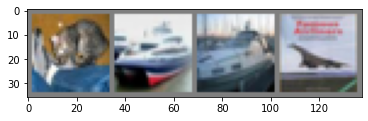

GroundTruth:    cat  ship  ship plane


In [28]:
# Test your alien

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))